<a href="https://colab.research.google.com/github/BayyaChinnu4202/DEEP-LEARNING-EXPERIMENT-3/blob/main/experiment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train,y_train),(x_test,y_test)=reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1
  return results
x_train=vectorize_sequences(x_train)
x_test=vectorize_sequences(x_test)
num_classes=max(y_train)+1
y_train=to_categorical(y_train,num_classes)
y_test=to_categorical(y_test,num_classes)

In [ ]:
model=Sequential()
model.add(Dense(64,activation='relu',input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=20,batch_size=512)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.2345 - loss: 3.3742 - val_accuracy: 0.5601 - val_loss: 2.0537
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5126 - loss: 2.1210 - val_accuracy: 0.6554 - val_loss: 1.5988
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6067 - loss: 1.6709 - val_accuracy: 0.6910 - val_loss: 1.4119
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.6469 - loss: 1.5112 - val_accuracy: 0.6986 - val_loss: 1.3151
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.6766 - loss: 1.3942 - val_accuracy: 0.7079 - val_loss: 1.2507
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7001 - loss: 1.2536 - val_accuracy: 0.7177 - val_loss: 1.2120
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7147 - loss: 1.1875 - val_accuracy: 0.7271 - val_loss: 1.1712
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7325 - loss: 1.1194 - val_accuracy: 0.7329 - v

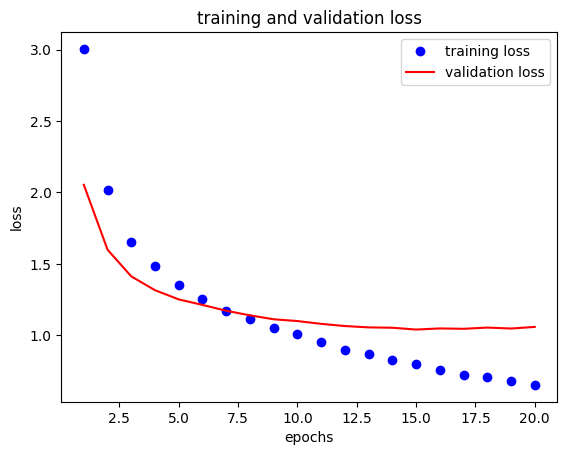

In [ ]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label='training loss')
plt.plot(epochs,val_loss,'r',label='validation loss')
plt.title('training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

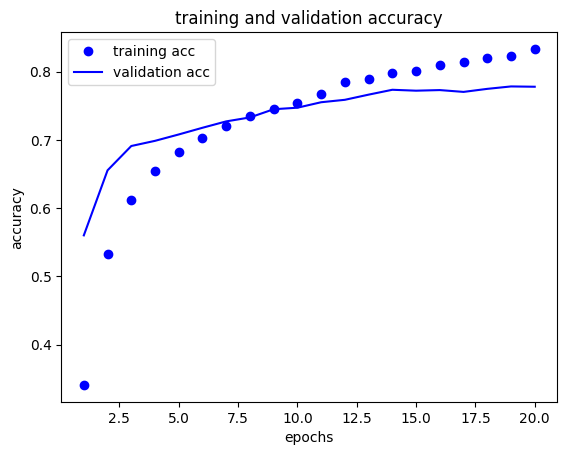

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1,len(loss)+1)
plt.plot(epochs,acc,'bo',label='training acc')
plt.plot(epochs,val_acc,'b',label='validation acc')
plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred=model.predict(x_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true_classes=np.argmax(y_test,axis=1)
conf_matrix=confusion_matrix(y_true_classes,y_pred_classes)
print('Confusion Matrix:\n',conf_matrix)
report=classification_report(y_true_classes,y_pred_classes)
print('Classification Report:\n',report)

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Confusion Matrix:
 [[ 8  2  0 ...  0  0  0]
 [ 0 87  1 ...  0  0  0]
 [ 0  3 13 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.67      0.62        12
           1       0.63      0.83      0.71       105
           2       0.68      0.65      0.67        20
           3       0.91      0.95      0.93       813
           4       0.82      0.90      0.86       474
           5       0.00      0.00      0.00         5
           6       1.00      0.79      0.88        14
           7       0.00      0.00      0.00         3
           8       0.67      0.68      0.68        38
           9       0.76      0.64      0.70        25
          10       0.81      0.87      0.84        30
          11       0.54      0.80      0.64        83
          12       0.00      0.00      0.00        13
     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
